In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data['data']
y = data['target']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge()
param_grid = {'alpha': np.logspace(-4, 4, 50)}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha (lambda) value: {best_alpha}")

Best alpha (lambda) value: 159.98587196060572


In [41]:
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

y_pred = ridge_best.predict(X_test)
y_pred

array([2.83935943, 1.28236772, 1.45056663, ..., 1.55825372, 1.42829587,
       2.60061952])

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse}")

Mean Squared Error on the test set: 0.5388359942333095


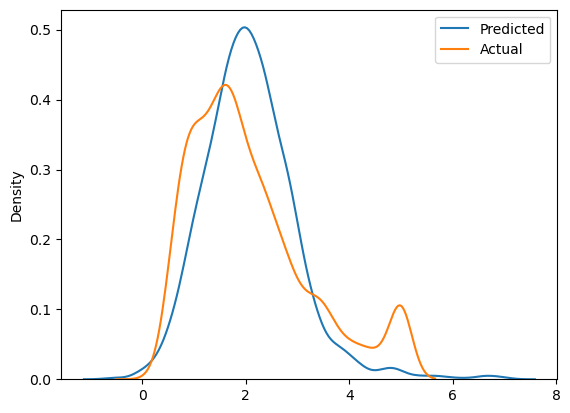

In [43]:
sns.kdeplot(y_pred, label="Predicted")
sns.kdeplot(y_test, label="Actual")
plt.legend()
plt.show()

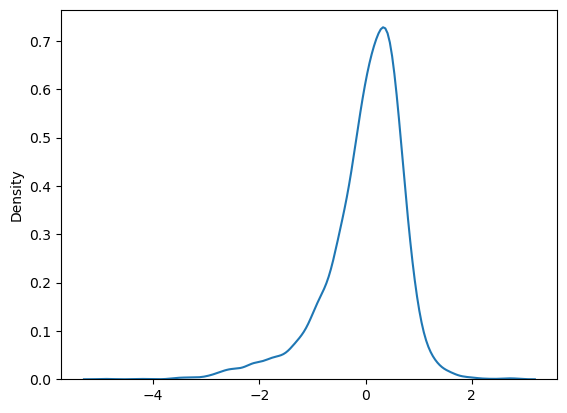

In [44]:
sns.kdeplot(y_pred-y_test)
plt.show()